로지스틱 회귀-유방암
==
- 로지스틱회귀(logistic regression)의 개념
    - 임의의 범위를 갖는 값으로부터 0과 1 사이의 값을 예측하거나 
    - 이진 분류(binary classification)에 사용
- BreastCancer.csv

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

- pass_time : 합격자 공부 시간
- fail_time : 불합격자 공부 시간

In [32]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

- np.hstack()
    - horizontal stack(옆으로 이어 붙인다)

In [33]:
X = np.hstack((pass_time,fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [34]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

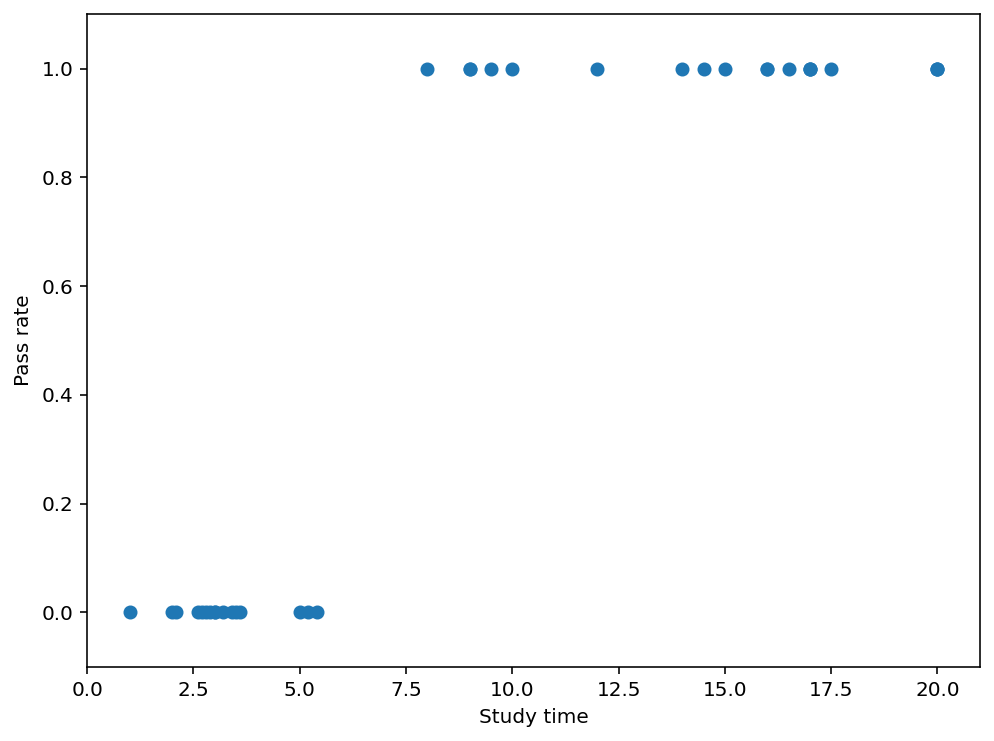

In [35]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X, y)
plt.show()

- 이와 같이 공부시간과 합격의 패턴이 알려진 시험에서 
- 만일 어떤 사람이 10시간을 공부한다면 이 사람을 합격 예정자로 분류할 수 있을까?
- 또는 합격할 확률은 얼마로 예상할 수 있을까?

- 이러한 관계를 모델링하는데, 로지스틱 회귀분석이 사용된다.
- 로지스틱 회귀는 이름은 회귀이지만 
- 분류 문제이므로 손실 함수로 크로스 엔트로피(cross entropy)를 사용한다.

In [36]:
model = LogisticRegression()
model.fit(X.reshape(-1, 1),y)

print(model.coef_)
print(model.intercept_)

#모델을 학습시킨다. fit

[[1.32952239]]
[-9.1854821]


In [37]:
sample = np.array([6.9])
# model.predict(sample.reshape[-1, 1])
model.predict(sample.reshape([-1, 1]))

#클래스를 예측 predict

array([0])

In [38]:
sample = np.array([13])
# model.predict(sample.reshape[-1, 1])
model.predict_proba(sample.reshape([-1, 1]))
#정확한 숫자 값을 예측한다 predict_proba

array([[3.03960452e-04, 9.99696040e-01]])

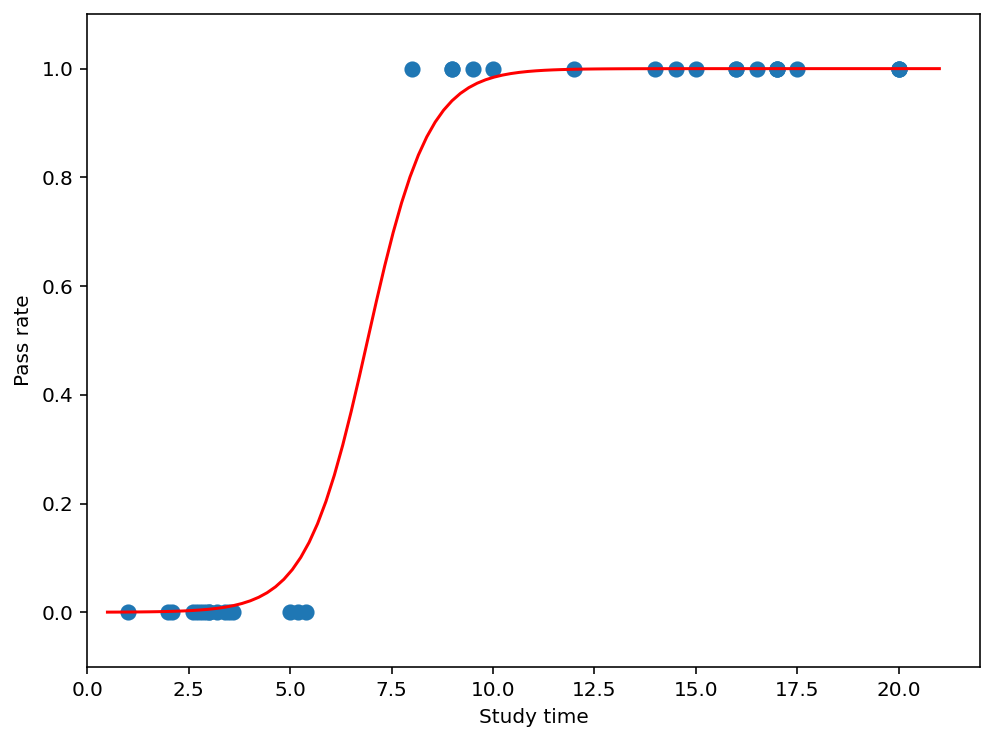

In [39]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 22)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(0.5,21, 100)
yy = logreg(model.coef_*XX + model.intercept_)[0]
plt.plot(XX, yy, c='r')
# plt.show()

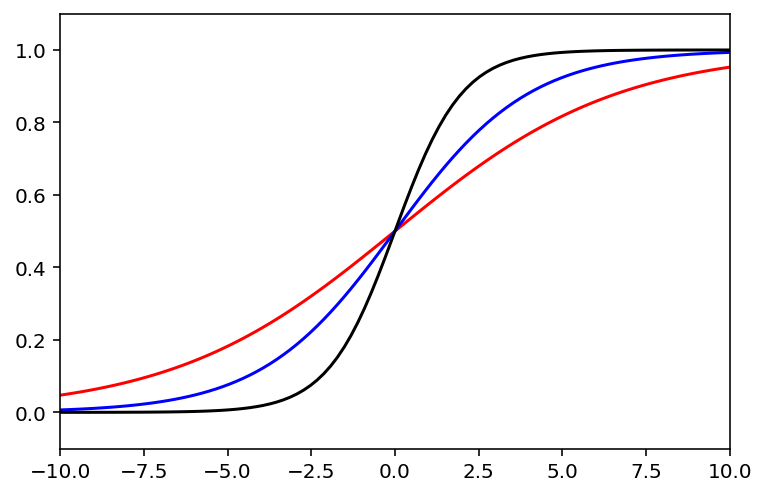

In [40]:
def logreg(z):
    return 1 /(1+np.exp(-z))

colors = ['r', 'b', 'k']
fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)

for i in range(3):
    for b in b_list: 
        yy = logreg(a_list[i]*XX + b)
        plt.plot(XX, yy, c=colors[i])        

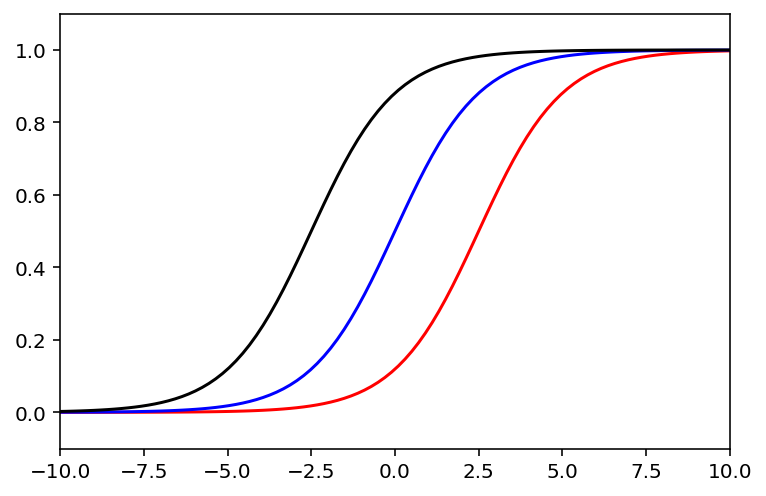

In [41]:
def logreg(z):
    return 1 /(1+np.exp(-z))

colors = ['r', 'b', 'k']
fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2, 0, 2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for i in range(3): 
        yy = logreg(a*XX + b_list[i])
        plt.plot(XX, yy, c=colors[i])

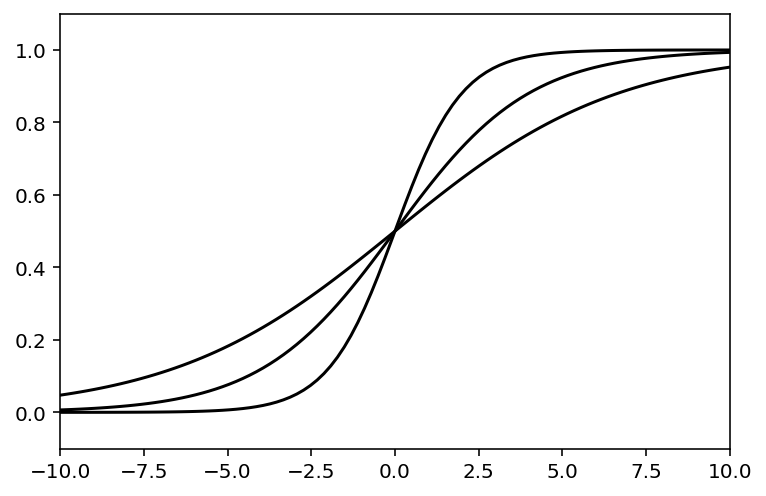

In [42]:
def logreg(z):
    return 1 /(1+np.exp(-z))

colors = ['r', 'b', 'k']
fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)

for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')        

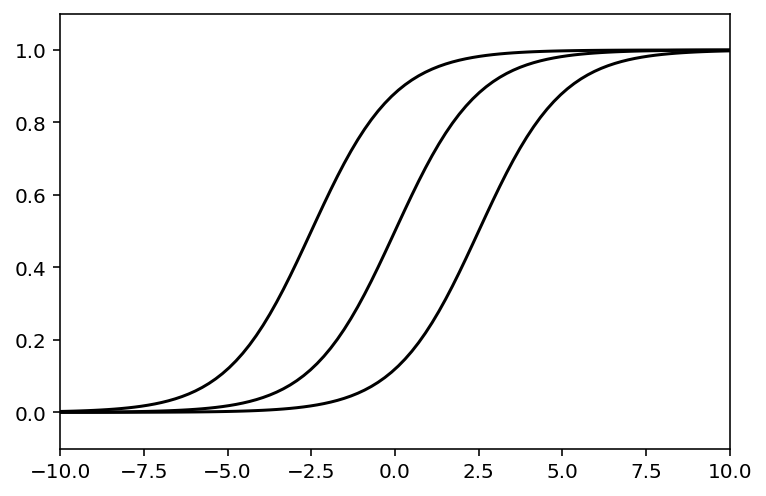

In [43]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2, 0, 2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

## 성능 비교
### 유방암 예제

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold             # K-fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [47]:
data = pd.read_csv('data/breast_cancer.csv')
print(data.shape)

FileNotFoundError: [Errno 2] File data/breast_cancer.csv does not exist: 'data/breast_cancer.csv'

In [48]:
data.head()

NameError: name 'data' is not defined

- 유방암 진단 데이터는 총 30개의 특성을 제공
- 이 중에 2개의 특성만 사용 : radius_mean, texture_mean
- diagnosis : label로 사용

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

### model로는 LogisticRegression() 사용

In [ ]:
model=LogisticRegression()
y = df["diagnosis"]

#### 먼저 radius_mean 특성만 사용
- 속성 radius_mean 하나만 사용하여 유방암 진단을 로지스틱 모델로 학습
- 테스트 데이터에 적용

In [16]:
features = ["radius_mean"]
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#x y 데이터를 숫자만큼으로 나눠준다.


model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))



NameError: name 'df' is not defined

In [17]:
X_test.shape

NameError: name 'X_test' is not defined

In [18]:
print(model.coef_)
print(model.intercept_)

[[1.32952239]]
[-9.1854821]


In [19]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

NameError: name 'X_train' is not defined

<Figure size 576x288 with 0 Axes>

#### 이번엔 texture_mean 특성만 사용
- 속성 texture_mean 하나만 사용하여 유방암 진단을 로지스틱 모델로 학습
- 테스트 데이터에 적용

In [20]:
features = ["texture_mean"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

NameError: name 'df' is not defined

In [21]:
print(model.coef_)
print(model.intercept_)

[[1.32952239]]
[-9.1854821]


In [22]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

NameError: name 'X_train' is not defined

<Figure size 576x288 with 0 Axes>

#### 이제 2개의 특성을 모두 사용
- 속성 radius_mean, texture_mean 2개를 모두 사용하여 유방암 진단을 로지스틱 모델로 학습
- 테스트 데이터에 적용

In [23]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

NameError: name 'df' is not defined

- 성능이 개선된 것을 볼 수 있다

In [24]:
markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

NameError: name 'X_train' is not defined

## 원래 데이터의 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행

In [25]:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
X=data.drop('diagnosis', axis=1)

NameError: name 'data' is not defined

In [26]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
print("Score: {0:.2%}".format(model_all.score(X_test, y_test)))

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.   2.  12.  16.   5.   1.   9.  10.   3.4  3.6  8.   5.2  3.5  2.8
 20.  14.5  9.  17.  17.   2.7 20.   3.2 20.   2.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# 모든 속성을 다 사용한 경우의 kNN의 성능

In [27]:
from sklearn.neighbors import KNeighborsClassifier  

for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.   2.  12.  16.   5.   1.   9.  10.   3.4  3.6  8.   5.2  3.5  2.8
 20.  14.5  9.  17.  17.   2.7 20.   3.2 20.   2.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# 결정 트리

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.   2.  12.  16.   5.   1.   9.  10.   3.4  3.6  8.   5.2  3.5  2.8
 20.  14.5  9.  17.  17.   2.7 20.   3.2 20.   2.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# 랜덤 포레스트

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.   2.  12.  16.   5.   1.   9.  10.   3.4  3.6  8.   5.2  3.5  2.8
 20.  14.5  9.  17.  17.   2.7 20.   3.2 20.   2.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

- 랜덤 포레스트를 사용할 경우, 성능이 가장 좋은 것을 알 수 있다.

## 소프트맥스
- 다항 로지스틱스
     * 각 클래스로 분류될 가능성을 나타내는 점수를 구하고
     * 이 점수들을 사용하여 상대적인 확률을 구하는 softmax 함수 사용
     * 입력값이 음수이어도 출력은 0~1 사의 값을 가진다.

In [30]:
score = [-1, -0.5, 1.0, 1.5]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.045 0.074 0.333 0.548]
